# Импорты

In [4]:
# импортируем всё необходимое для работы
import pandas as pd
import numpy as np
from numpy import ravel

import matplotlib.pyplot as plt
import seaborn as sns

import glob

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

# Объединение файлов

In [330]:
# сохраненяем все имена файлов из папки в массив
files = [item for item in glob.glob(r'dataset_test/*{}'.format('.csv'))]
# files

In [331]:
# объеденяем все файлы в один файл 
combined = pd.DataFrame()
for i in files:
  file = pd.read_csv(i, sep=';')
  combined = pd.concat([combined, file])

In [332]:
# обновим индексы 
combined.reset_index(drop = True)

,Echosounder.CasingHeadPressure,Echosounder.FluidLevel,ESP.DecelerationTime,ESP.Frequency,ESP.Frequency.SP,ESP.IntakePressure,ESP.IntakeTemperature,ESP.Mode,ESP.Motor.ActivePower,ESP.Motor.Current.Active,...,diff_ESP.Frequency,diff_ESP.Motor.CurrentUnbalance,diff_ESP.Motor.Load,diff_ESP.Motor.Resistance,diff_ESP.Motor.Temperature,diff_ESP.Motor.VoltageUnbalance,diff_ESP.TurbineFrequency,diff_ESP.RatedVoltage,Power,ESP.PHI
0,NaN,NaN,NaN,50.00,NaN,NaN,NaN,NaN,NaN,NaN,...,-50.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26540.400000,NaN
1,NaN,NaN,NaN,50.00,NaN,32.275000,101.283333,NaN,NaN,NaN,...,-50.00,18.418966,NaN,-8293.122807,-101.984722,NaN,NaN,-295.0,30646.216667,NaN
2,NaN,NaN,NaN,45.02,NaN,32.283333,101.333333,NaN,NaN,NaN,...,-45.02,18.459259,12.175396,-8005.389098,-102.087500,NaN,NaN,-295.0,27428.206083,NaN
3,NaN,NaN,NaN,45.02,NaN,31.616667,101.441667,NaN,NaN,NaN,...,-45.02,18.949074,-17.023438,-7923.382035,-103.308333,NaN,NaN,-295.0,27588.616582,NaN
4,NaN,NaN,NaN,50.00,NaN,31.908333,101.408333,NaN,NaN,NaN,...,-50.00,19.000000,-19.418268,-7933.689394,-102.658333,NaN,NaN,-295.0,33221.066667,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216434,NaN,NaN,NaN,48.00,NaN,195.580000,0.000000,NaN,NaN,NaN,...,-18.00,19.000000,-7.725000,-929.660569,-101.000000,4.0,NaN,-295.0,21274.494566,NaN
216435,NaN,NaN,NaN,48.00,NaN,195.580000,0.000000,NaN,NaN,NaN,...,-18.00,19.000000,-7.704167,-932.350702,-101.000000,4.0,NaN,-295.0,21279.903252,NaN
216436,NaN,NaN,NaN,48.00,NaN,195.580000,0.000000,NaN,NaN,NaN,...,-18.00,19.000000,-7.560000,-934.783694,-101.000000,4.0,NaN,-295.0,21269.432402,NaN
216437,NaN,NaN,NaN,48.00,NaN,195.580000,0.000000,NaN,NaN,NaN,...,-18.00,19.000000,-7.566667,-950.040650,-101.000000,4.0,NaN,-295.0,21262.521139,NaN


In [32]:
# сохраним файл в csv 
combined.to_csv('file_01.csv')

# Выгрузка и первое знакомство

In [5]:
# выгружаем, знакомимся
df = pd.read_csv('file_01.csv')
df

,Unnamed: 0,Echosounder.CasingHeadPressure,Echosounder.FluidLevel,ESP.DecelerationTime,ESP.Frequency,ESP.Frequency.SP,ESP.IntakePressure,ESP.IntakeTemperature,ESP.Mode,ESP.Motor.ActivePower,...,diff_ESP.Frequency,diff_ESP.Motor.CurrentUnbalance,diff_ESP.Motor.Load,diff_ESP.Motor.Resistance,diff_ESP.Motor.Temperature,diff_ESP.Motor.VoltageUnbalance,diff_ESP.TurbineFrequency,diff_ESP.RatedVoltage,Power,ESP.PHI
0,0,NaN,NaN,NaN,50.00,NaN,NaN,NaN,NaN,NaN,...,-50.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26540.400000,NaN
1,1,NaN,NaN,NaN,50.00,NaN,32.275000,101.283333,NaN,NaN,...,-50.00,18.418966,NaN,-8293.122807,-101.984722,NaN,NaN,-295.0,30646.216667,NaN
2,2,NaN,NaN,NaN,45.02,NaN,32.283333,101.333333,NaN,NaN,...,-45.02,18.459259,12.175396,-8005.389098,-102.087500,NaN,NaN,-295.0,27428.206083,NaN
3,3,NaN,NaN,NaN,45.02,NaN,31.616667,101.441667,NaN,NaN,...,-45.02,18.949074,-17.023438,-7923.382035,-103.308333,NaN,NaN,-295.0,27588.616582,NaN
4,4,NaN,NaN,NaN,50.00,NaN,31.908333,101.408333,NaN,NaN,...,-50.00,19.000000,-19.418268,-7933.689394,-102.658333,NaN,NaN,-295.0,33221.066667,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216434,759,NaN,NaN,NaN,48.00,NaN,195.580000,0.000000,NaN,NaN,...,-18.00,19.000000,-7.725000,-929.660569,-101.000000,4.0,NaN,-295.0,21274.494566,NaN
216435,760,NaN,NaN,NaN,48.00,NaN,195.580000,0.000000,NaN,NaN,...,-18.00,19.000000,-7.704167,-932.350702,-101.000000,4.0,NaN,-295.0,21279.903252,NaN
216436,761,NaN,NaN,NaN,48.00,NaN,195.580000,0.000000,NaN,NaN,...,-18.00,19.000000,-7.560000,-934.783694,-101.000000,4.0,NaN,-295.0,21269.432402,NaN
216437,762,NaN,NaN,NaN,48.00,NaN,195.580000,0.000000,NaN,NaN,...,-18.00,19.000000,-7.566667,-950.040650,-101.000000,4.0,NaN,-295.0,21262.521139,NaN


In [360]:
# посмотрим общую информацию: кол-во значений, тип
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216439 entries, 0 to 216438
Data columns (total 67 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       216439 non-null  int64  
 1   Echosounder.CasingHeadPressure   9759 non-null    float64
 2   Echosounder.FluidLevel           5718 non-null    float64
 3   ESP.DecelerationTime             6124 non-null    float64
 4   ESP.Frequency                    216439 non-null  float64
 5   ESP.Frequency.SP                 6296 non-null    float64
 6   ESP.IntakePressure               213530 non-null  float64
 7   ESP.IntakeTemperature            161354 non-null  float64
 8   ESP.Mode                         0 non-null       float64
 9   ESP.Motor.ActivePower            7247 non-null    float64
 10  ESP.Motor.Current.Active         4661 non-null    float64
 11  ESP.Motor.Current.Full           18762 non-null   float64
 12  ES

In [361]:
# посмотрим на кол-во пропущеных значений
print(df.isna().sum().head(33))
print(df.isna().sum().tail(33))

Unnamed: 0                             0
Echosounder.CasingHeadPressure    206680
Echosounder.FluidLevel            210721
ESP.DecelerationTime              210315
ESP.Frequency                          0
ESP.Frequency.SP                  210143
ESP.IntakePressure                  2909
ESP.IntakeTemperature              55085
ESP.Mode                          216439
ESP.Motor.ActivePower             209192
ESP.Motor.Current.Active          211778
ESP.Motor.Current.Full            197677
ESP.Motor.CurrentU                     0
ESP.Motor.CurrentUnbalance        209324
ESP.Motor.CurrentV                     0
ESP.Motor.CurrentW                     0
ESP.Motor.Load                    209199
ESP.Motor.PowerFactor             209193
ESP.Motor.Resistance              209546
ESP.Motor.Temperature             210099
ESP.Motor.TotalPowerLVU           206332
ESP.Motor.VibrationX              207305
ESP.Motor.VibrationY              207281
ESP.Motor.VibrationZ              210303
ESP.Motor.Voltag

# Грубая отчистка данных

In [6]:
# избавимся от колонки, если в ней больше 100к пропущеных значений
for col in df.columns:
    if df[col].isna().sum() > 100000:
        df = df.drop([col], axis = 1)
    else:
        df = df
print(len(df.columns))

32


In [7]:
# посмотрим на кол-во пропущеных значений по строкам
print(df.isnull().sum(axis=1).unique())
print(df.isnull().sum(axis=1).value_counts())

[14  4  3  2  1 15 12 11  5  0  9 13  7  8  6 10]
0     70772
1     48398
2     38363
3     29462
4     18592
5      4817
7      2432
6      2201
8       732
10      192
15      147
11      128
12       87
14       61
13       33
9        22
dtype: int64


In [8]:
# избавимся от строк, где больше 4 пропущеных значений
df = df.dropna(thresh=28).reset_index(drop = True)
print(df.isnull().sum(axis=1).value_counts())

0    70772
1    48398
2    38363
3    29462
4    18592
dtype: int64


In [355]:
# посмотрим, что осталось
print(len(df.columns))
df.isna().sum()

46


Unnamed: 0                             0
Echosounder.CasingHeadPressure    112699
Echosounder.FluidLevel            115542
ESP.DecelerationTime              115159
ESP.Frequency                          0
ESP.Frequency.SP                  115191
ESP.IntakePressure                     0
ESP.IntakeTemperature                  0
ESP.Mode                          118364
ESP.Motor.ActivePower             115151
ESP.Motor.Current.Active          116147
ESP.Motor.Current.Full            107134
ESP.Motor.CurrentUnbalance        115152
ESP.Motor.CurrentW                     0
ESP.Motor.Load                    115151
ESP.Motor.PowerFactor             115151
ESP.Motor.Resistance              114618
ESP.Motor.Temperature             115151
ESP.Motor.TotalPowerLVU           111789
ESP.Motor.VibrationX              113342
ESP.Motor.VibrationY              113342
ESP.Motor.VibrationZ              115151
ESP.Motor.VoltageCA                    0
ESP.Motor.VoltageUnbalance        115151
ESP.OutputPressu

# Визуализация и более детальная очистка данных

In [9]:
# распечатаем статистические показатели по каждому столбику
for col in df.columns[1:]:
    print('Название колонки: ' + col)
    print('Кол-во уникальных значений: ' + str(len(df[col].unique())))
    print(df[col].describe())
    print('-----')

Название колонки: ESP.Frequency
Кол-во уникальных значений: 8460
count    205587.000000
mean         58.948063
std          17.076356
min          10.150000
25%          50.000000
50%          54.000000
75%          60.000000
max         120.000000
Name: ESP.Frequency, dtype: float64
-----
Название колонки: ESP.IntakePressure
Кол-во уникальных значений: 50264
count    204262.000000
mean         69.918608
std         671.786056
min           0.000000
25%          23.460000
50%          38.672896
75%          74.380000
max       32768.000000
Name: ESP.IntakePressure, dtype: float64
-----
Название колонки: ESP.IntakeTemperature
Кол-во уникальных значений: 33555
count    156672.000000
mean         63.561466
std          43.111229
min           0.000000
25%           0.000000
50%          88.000000
75%          90.330874
max         152.000000
Name: ESP.IntakeTemperature, dtype: float64
-----
Название колонки: ESP.Motor.CurrentU
Кол-во уникальных значений: 60290
count    205587.000000
mean 

count    205284.000000
mean       -336.088159
std         565.277482
min      -10379.000000
25%        -300.000000
50%        -300.000000
75%        -295.000000
max        2145.841667
Name: diff_ESP.RatedVoltage, dtype: float64
-----
Название колонки: Power
Кол-во уникальных значений: 176108
count    2.055870e+05
mean     8.080902e+04
std      7.447864e+05
min     -3.322181e+08
25%      2.398803e+04
50%      4.206142e+04
75%      9.277263e+04
max      2.327204e+07
Name: Power, dtype: float64
-----


ESP.Frequency


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


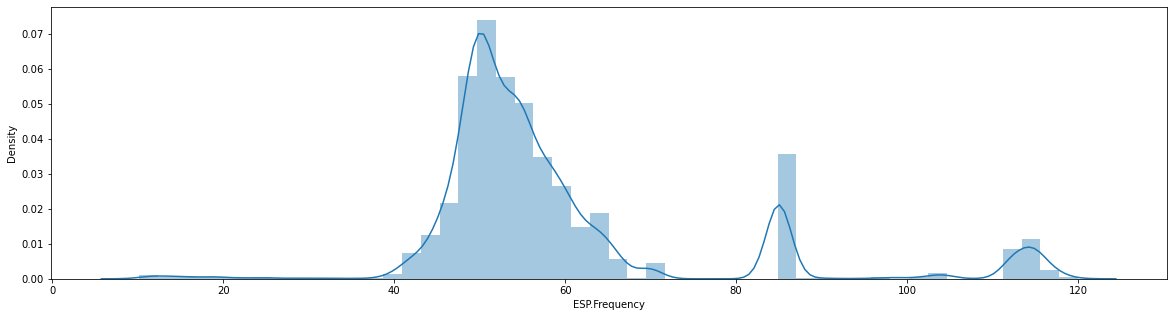

ESP.IntakePressure


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


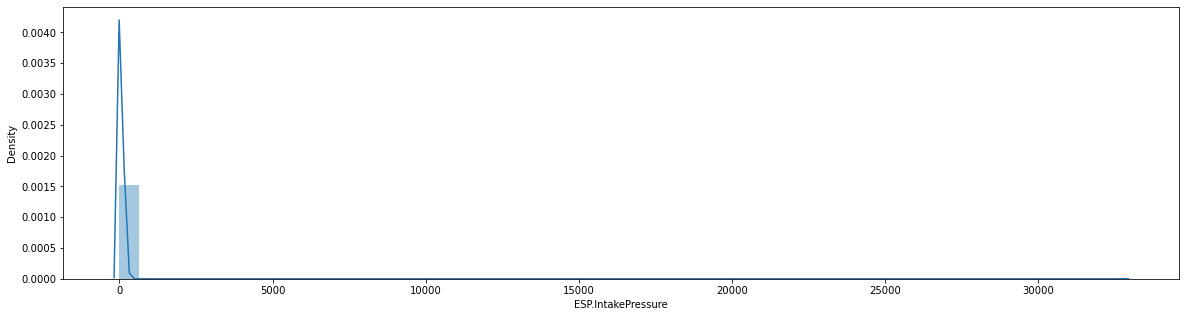

ESP.IntakeTemperature


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


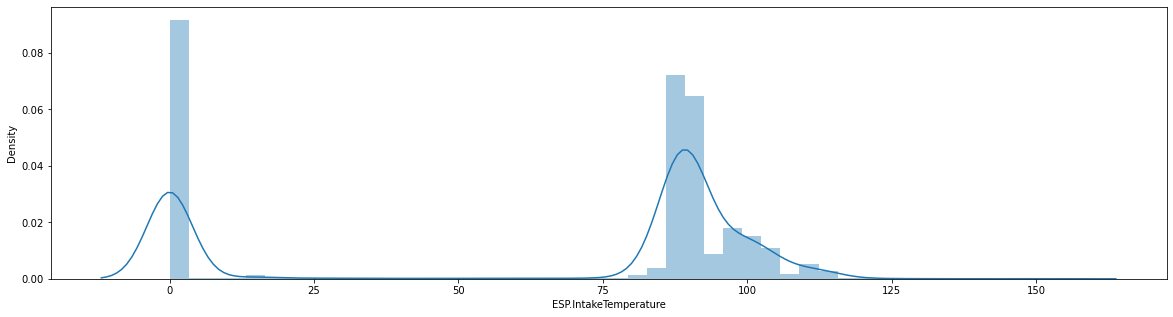

ESP.Motor.CurrentU


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


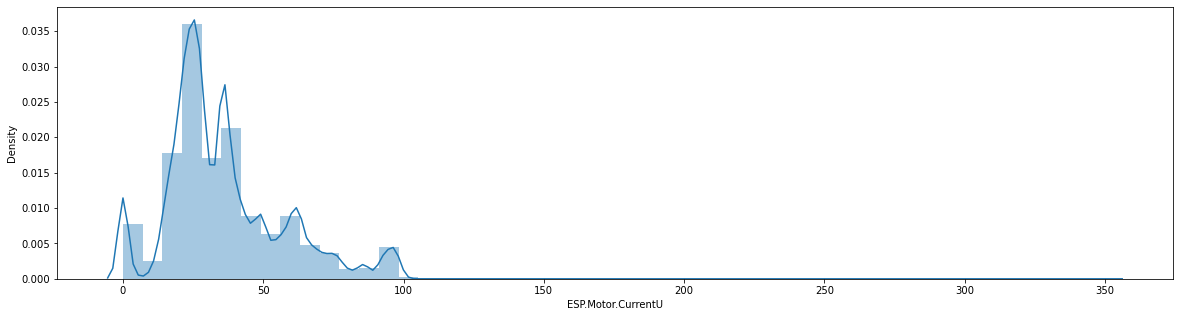

ESP.Motor.CurrentV


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


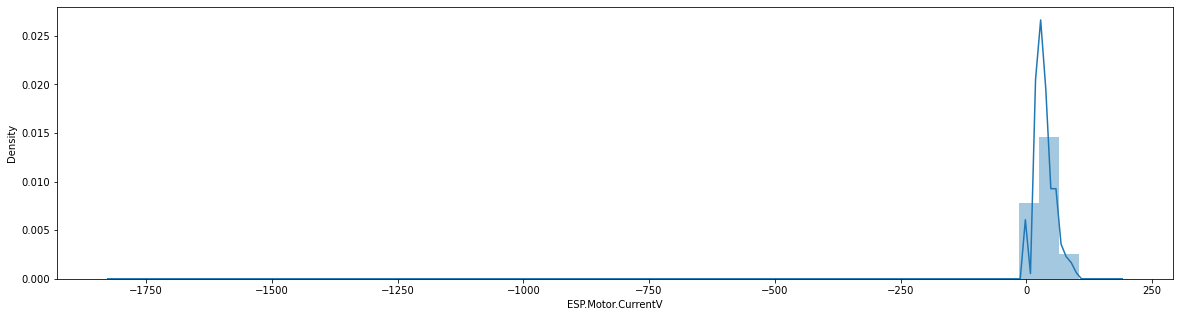

ESP.Motor.CurrentW


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


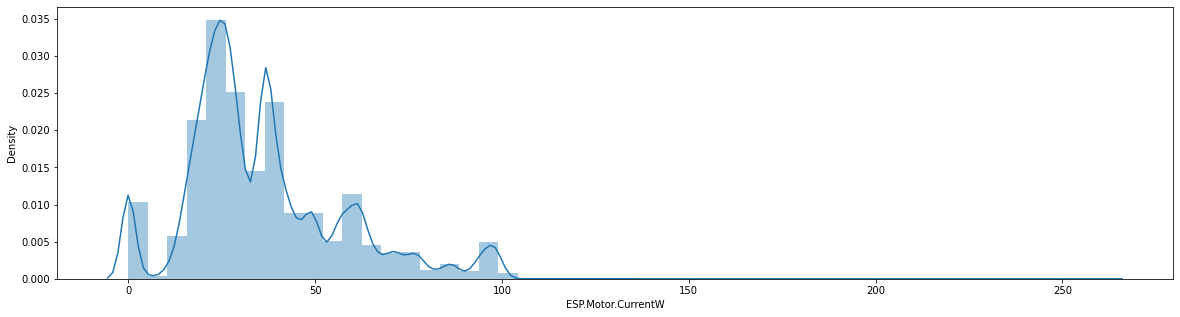

ESP.Motor.VoltageAB


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


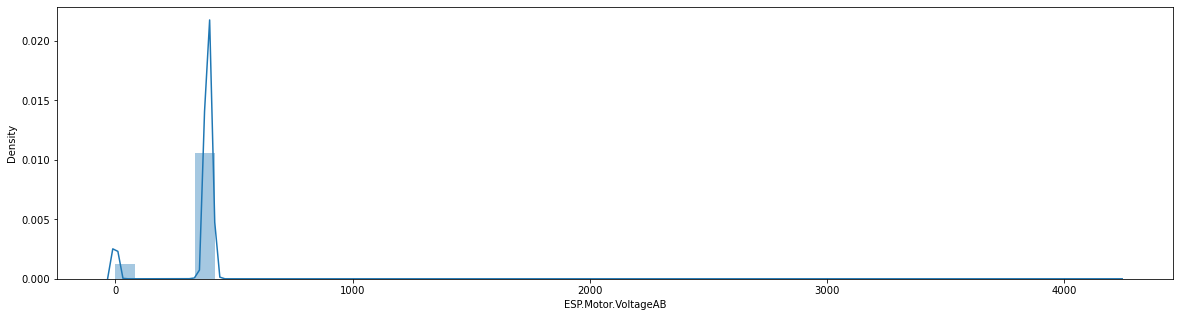

ESP.Motor.VoltageBC


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


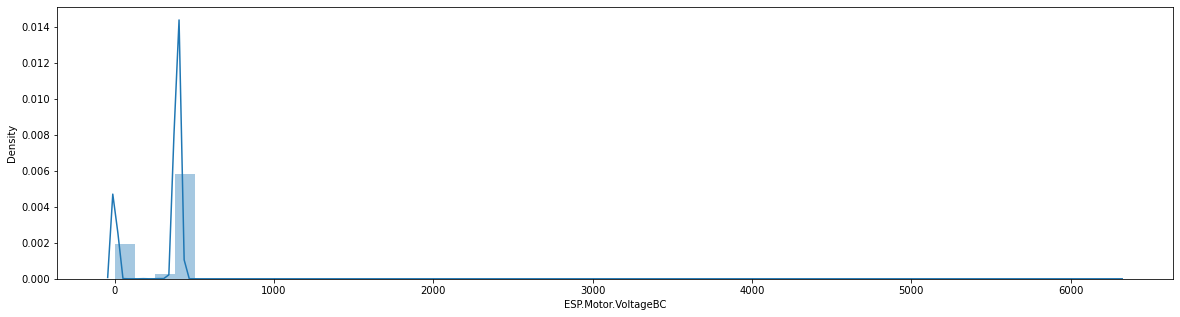

ESP.Motor.VoltageCA


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


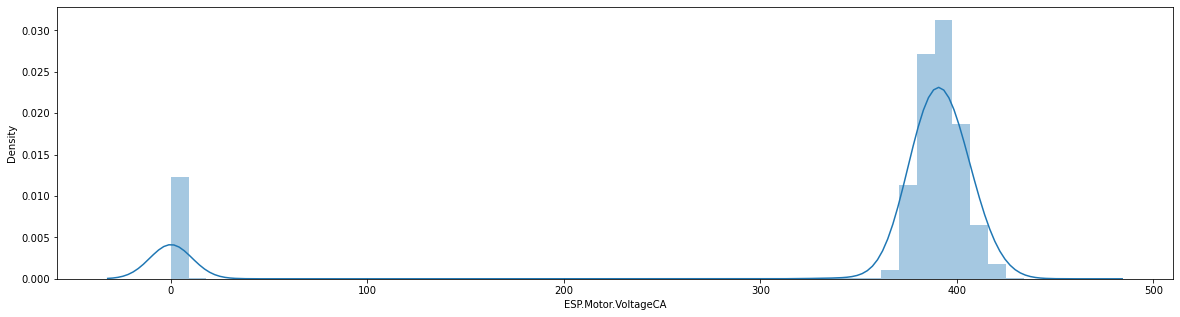

Sediments.Lab.Man


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


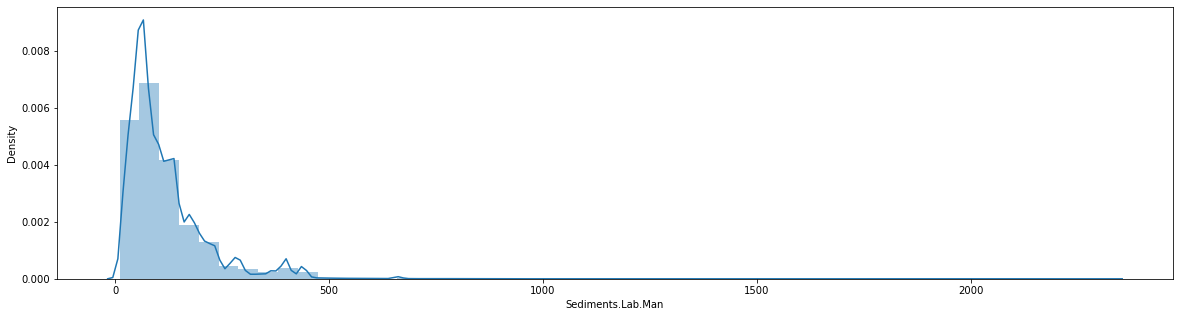

target


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


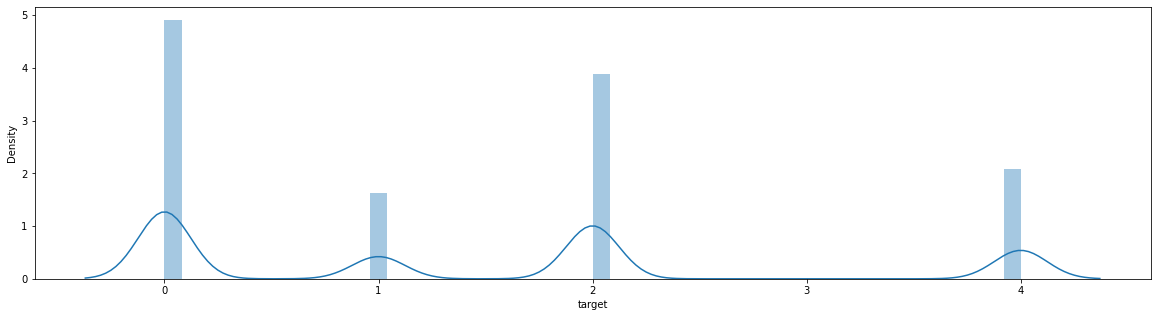

ResistanceFailure_number


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


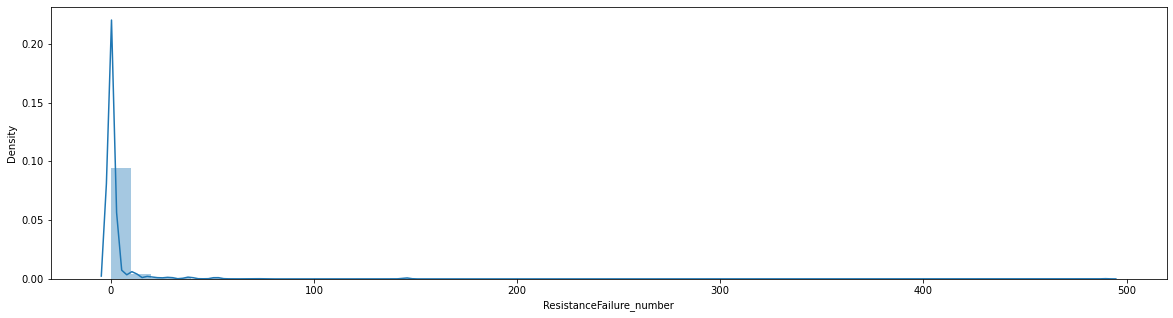

Mean_I


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


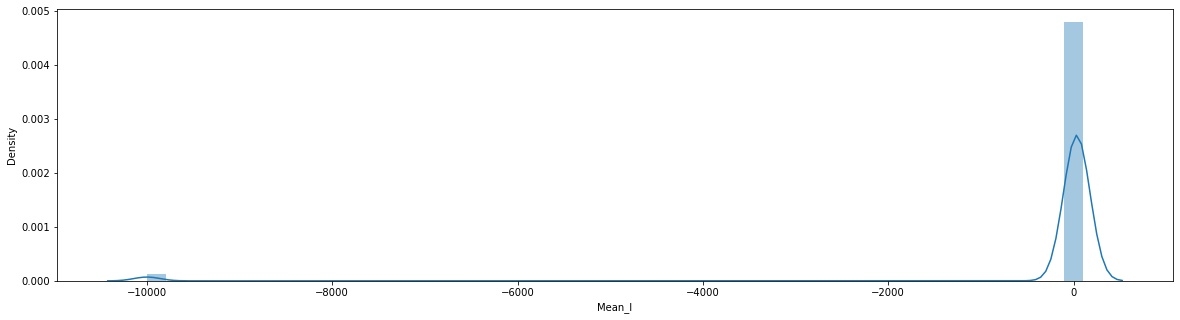

global_code


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


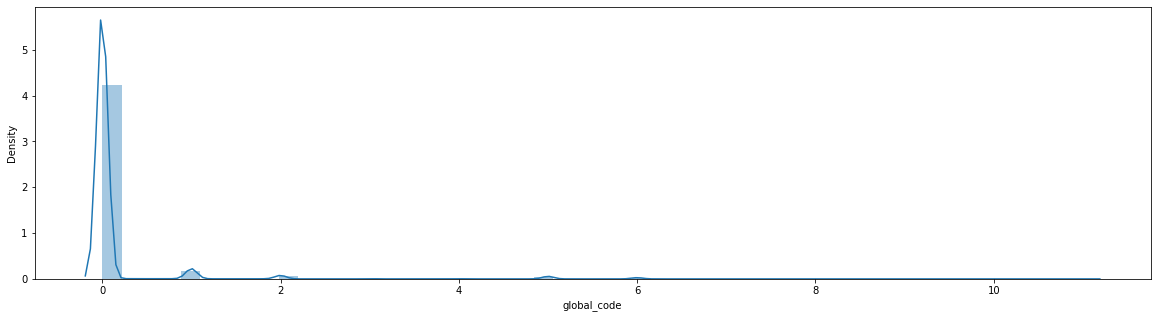

local_code


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


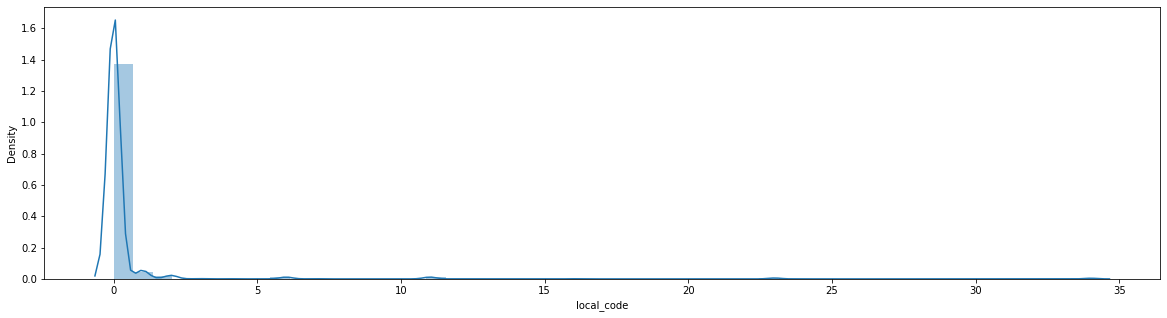

ESP.LiquidRate


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


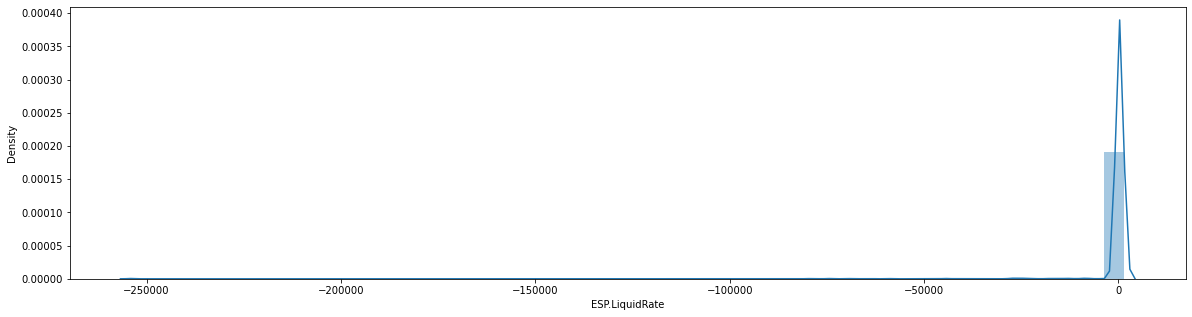

ESP.LiquidRateDifference


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


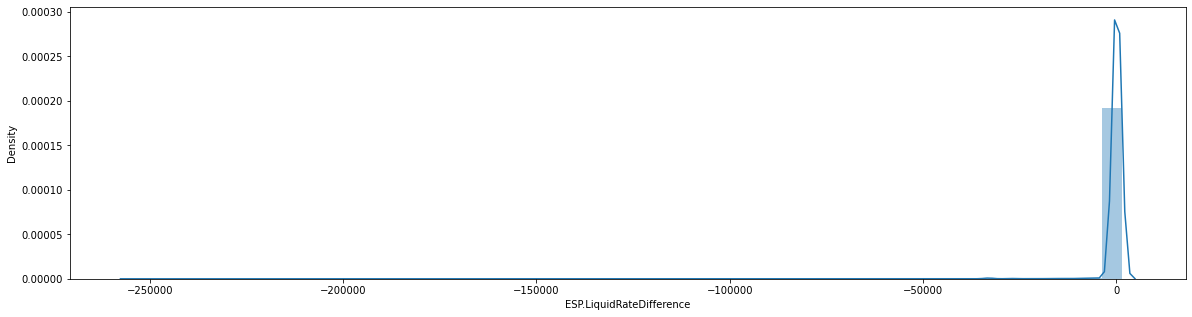

ESP.TMSFail


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


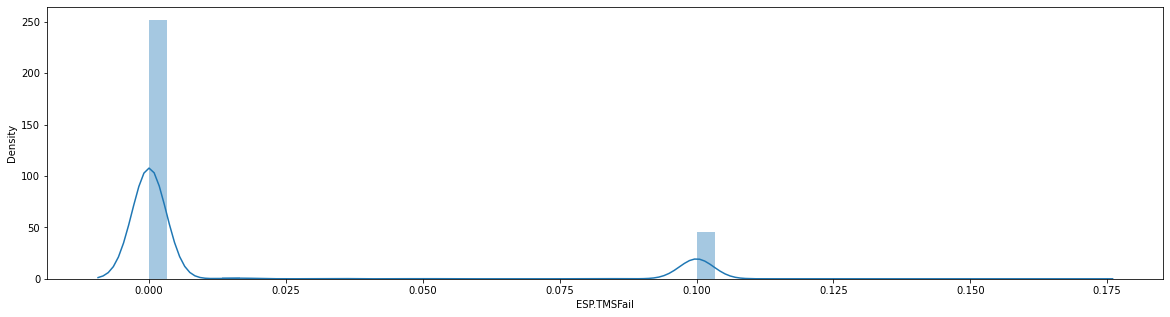

ESP.CoolingRate


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


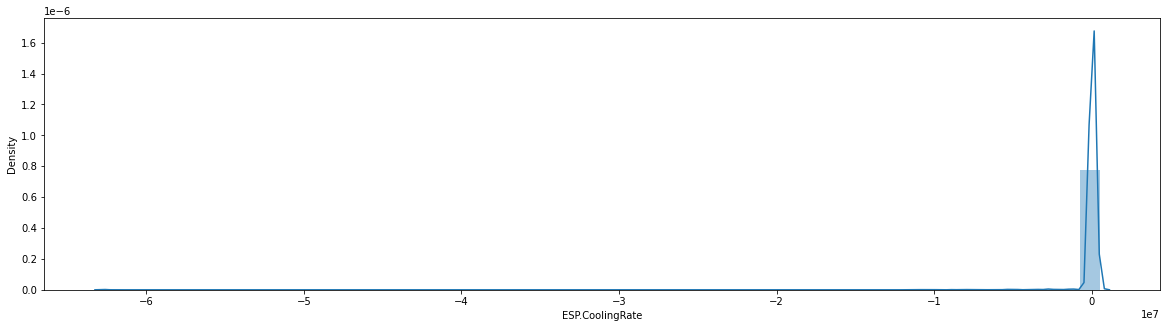

WorkingRegion


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


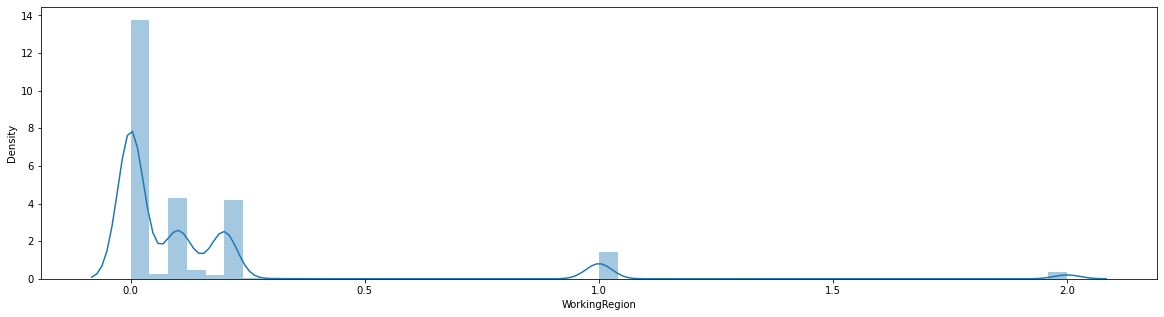

launches_number


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


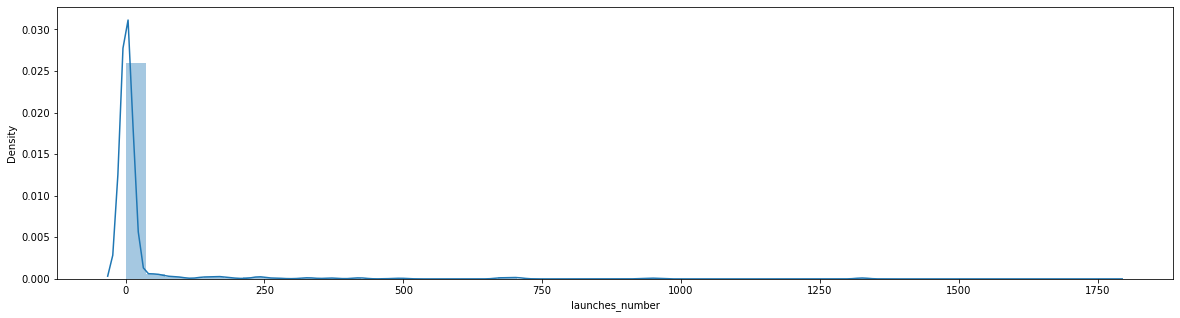

diff_FlowLinePressure


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


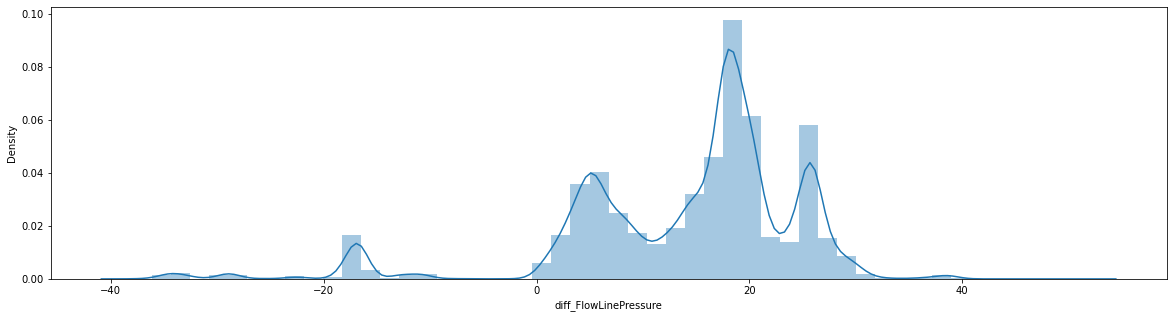

diff_ESP.IntakePressure


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


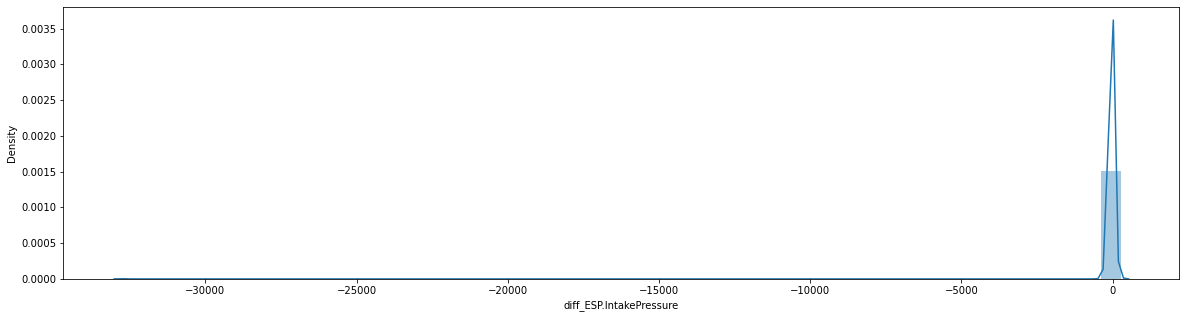

diff_ESP.Frequency


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


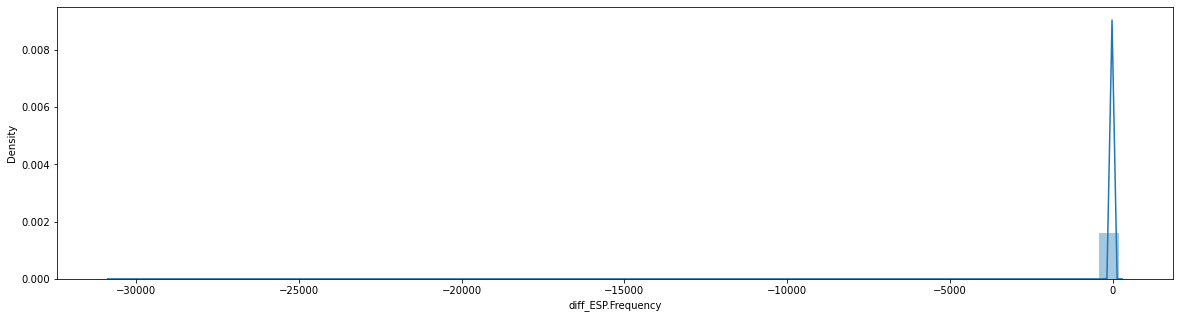

diff_ESP.Motor.CurrentUnbalance


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


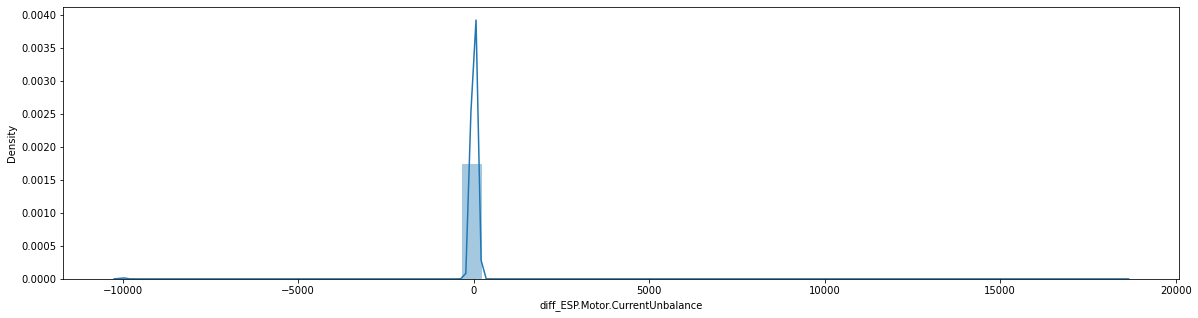

diff_ESP.Motor.Load


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


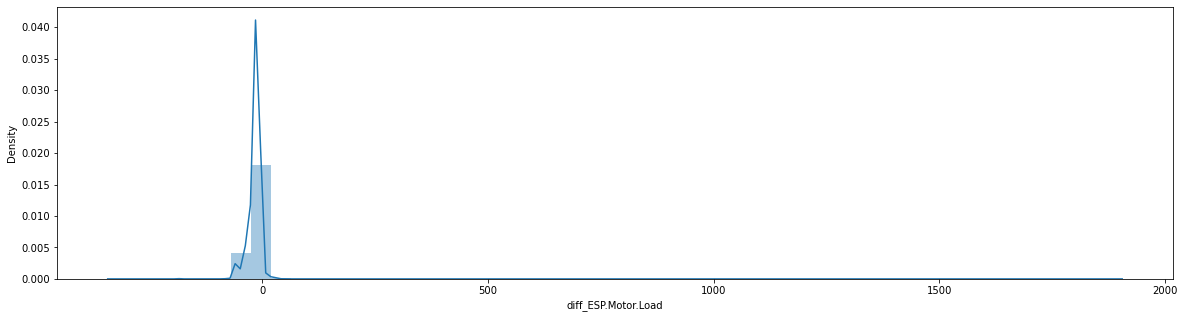

diff_ESP.Motor.Resistance


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


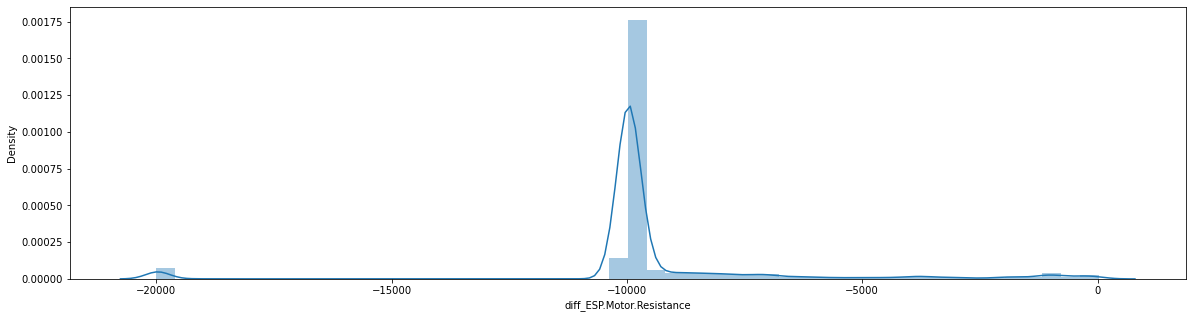

diff_ESP.Motor.Temperature


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


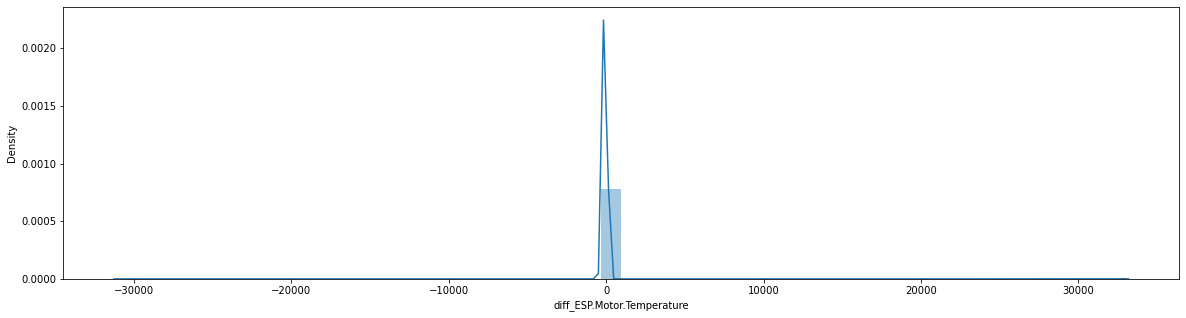

diff_ESP.Motor.VoltageUnbalance


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


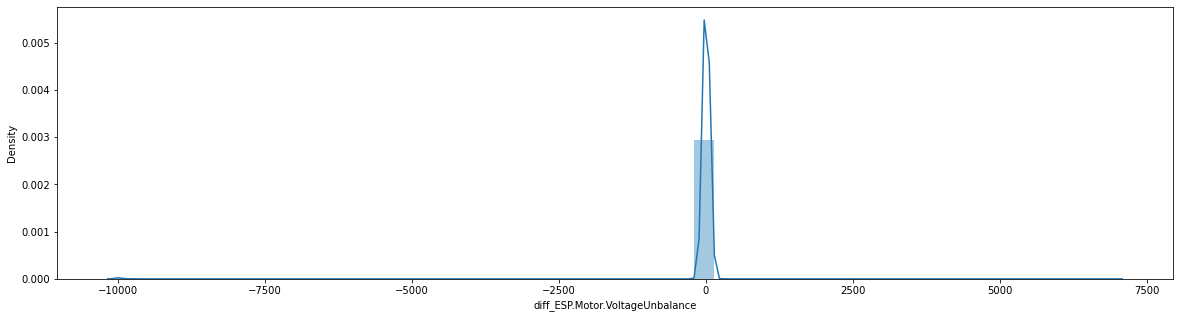

diff_ESP.RatedVoltage


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


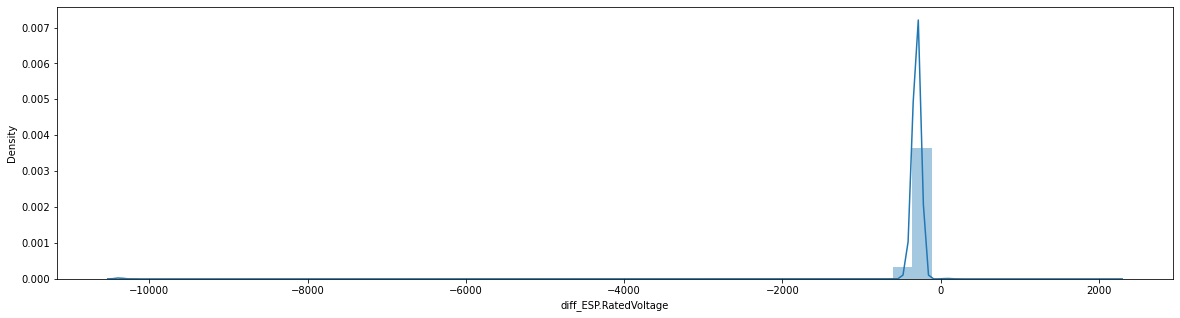

Power


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


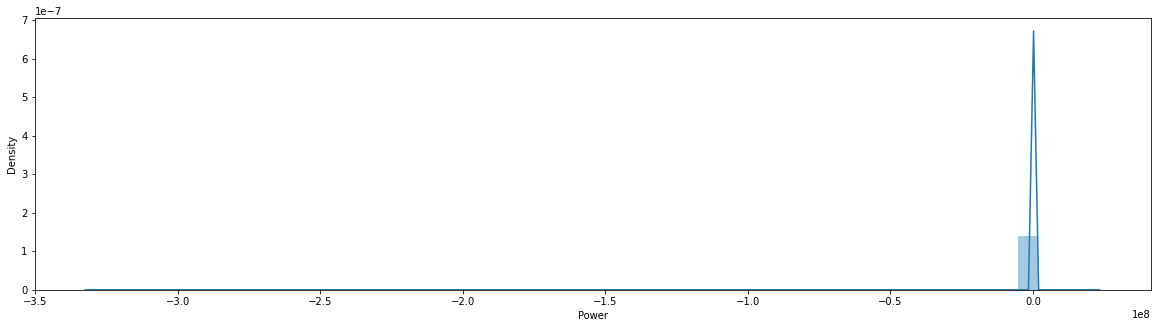

In [370]:
# создадим графики распределения 
for col in df.columns[1:]:
    print(col);
    plt.figure(figsize=(20,5));
    sns.distplot(df[col]);
    plt.show();

ESP.Frequency


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


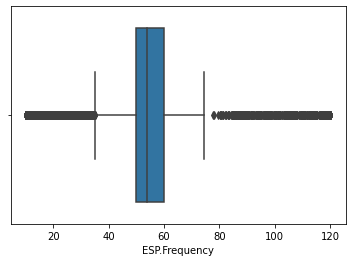

ESP.IntakePressure


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


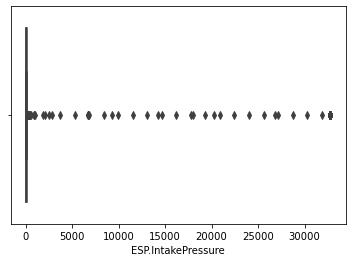

ESP.IntakeTemperature


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


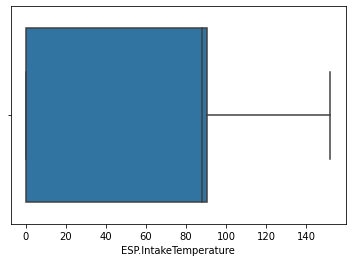

ESP.Motor.CurrentU


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


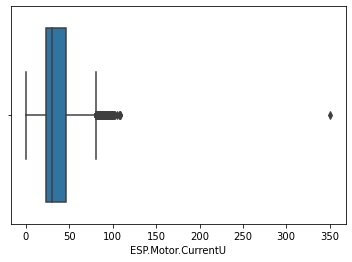

ESP.Motor.CurrentV


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


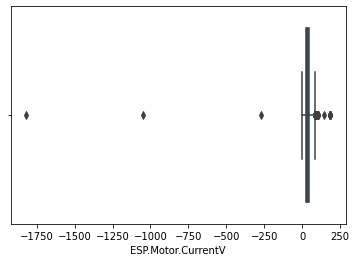

ESP.Motor.CurrentW


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


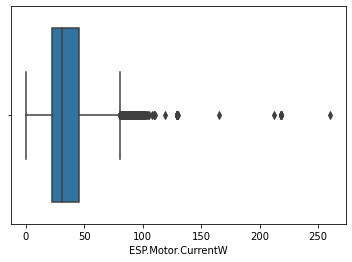

ESP.Motor.VoltageAB


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


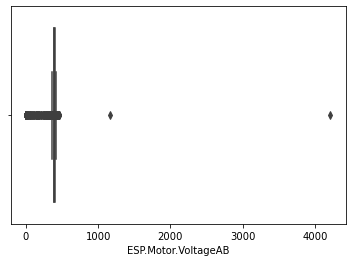

ESP.Motor.VoltageBC


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


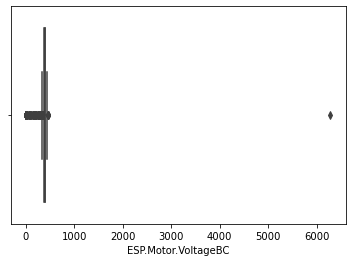

ESP.Motor.VoltageCA


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


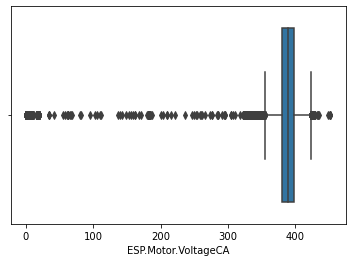

Sediments.Lab.Man


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


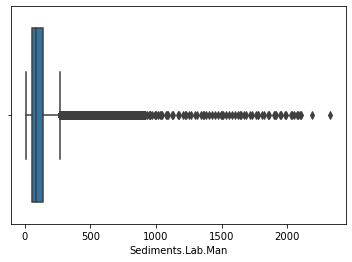

target


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


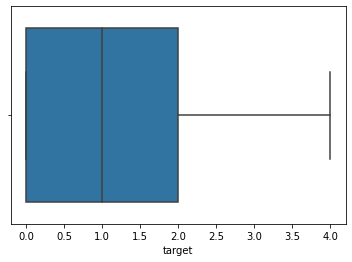

ResistanceFailure_number


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


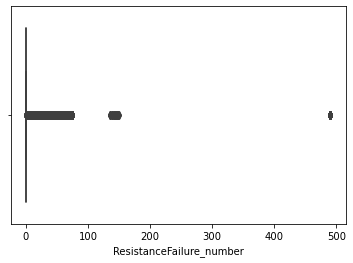

Mean_I


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


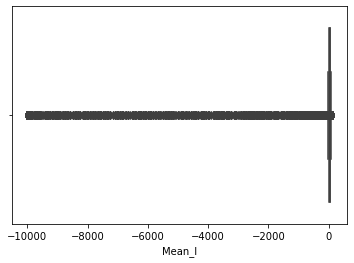

global_code


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


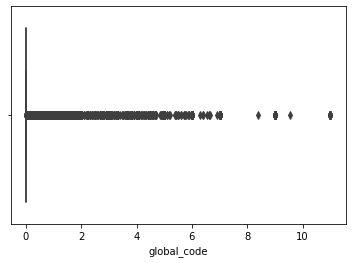

local_code


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


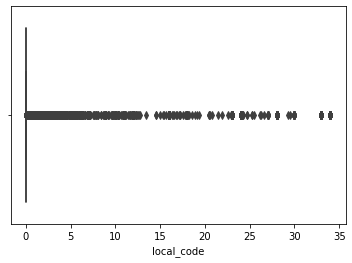

ESP.LiquidRate


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


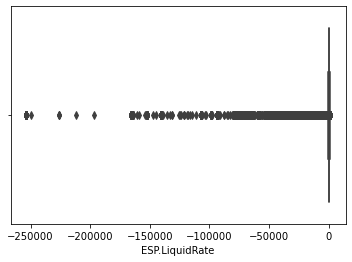

ESP.LiquidRateDifference


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


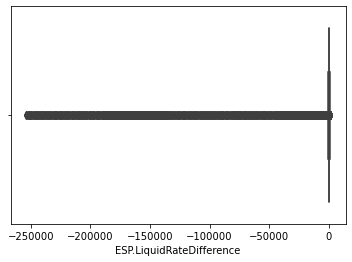

ESP.TMSFail


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


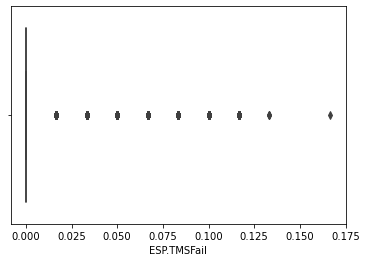

ESP.CoolingRate


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


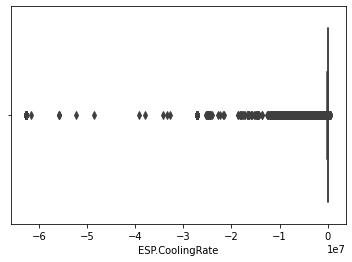

WorkingRegion


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


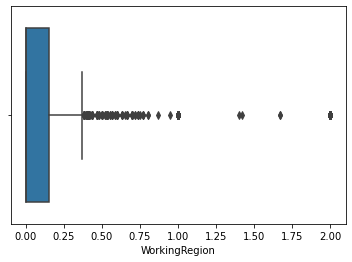

launches_number


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


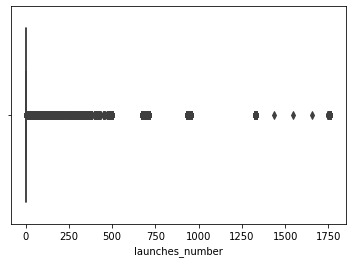

diff_FlowLinePressure


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


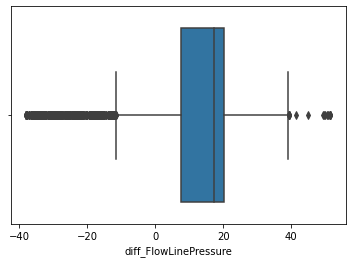

diff_ESP.IntakePressure


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


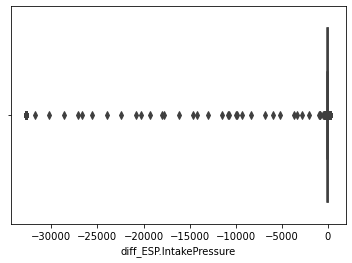

diff_ESP.Frequency


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


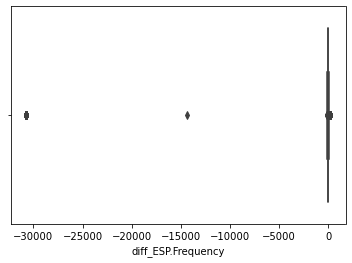

diff_ESP.Motor.CurrentUnbalance


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


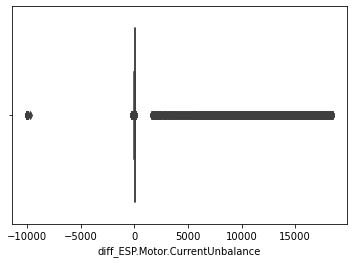

diff_ESP.Motor.Load


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


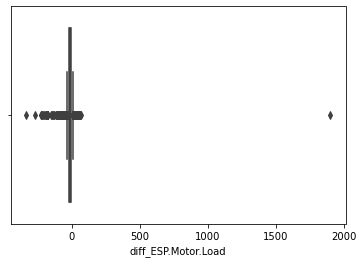

diff_ESP.Motor.Resistance


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


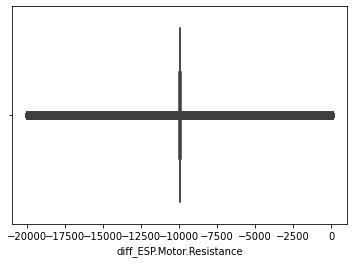

diff_ESP.Motor.Temperature


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


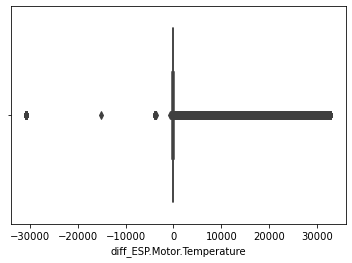

diff_ESP.Motor.VoltageUnbalance


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


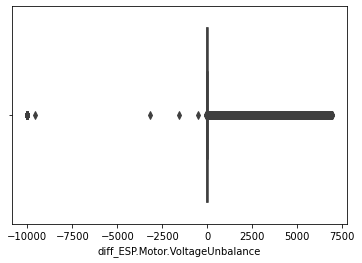

diff_ESP.RatedVoltage


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


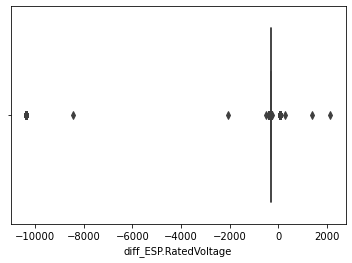

Power


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


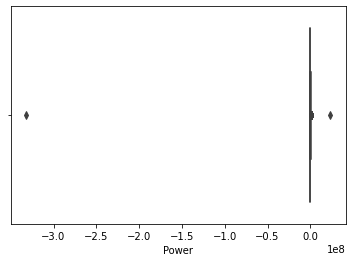

In [371]:
# создадим боксплоты
for col in df.columns[1:]:
    print(col);
    sns.boxplot(df[col]);
    plt.show();

In [388]:
# создадим массив с столбиками, которые хотим удалить
columns_for_del = ['Unnamed: 0',
                   'ESP.Motor.VoltageAB', 
                   'ESP.Motor.VoltageBC',
                   'ESP.Motor.CurrentU', 
                   'ESP.Motor.CurrentV',
                   'ResistanceFailure_number', 
                   'Mean_I', 
                   'global_code', 
                   'local_code',
                   'ESP.LiquidRate', 
                   'ESP.LiquidRateDifference', 
                   'ESP.TMSFail',
                   'ESP.CoolingRate', 
                   'WorkingRegion', 
                   'launches_number', 
                   'diff_ESP.IntakePressure',
                   'diff_ESP.Frequency', 
                   'diff_ESP.Motor.CurrentUnbalance',
                   'diff_ESP.Motor.Resistance', 
                   'diff_ESP.Motor.Temperature', 
                   'diff_ESP.Motor.VoltageUnbalance',
                   'diff_ESP.RatedVoltage'
                  ]

In [391]:
# удалим эти столбики
for col in columns_for_del:
    df = df.drop([col], axis = 1)

In [ ]:
# далее пройдемся по оставшимся столбикам: заполним пропущеные значения медианами и уберем выбросы

In [374]:
df = df[df['ESP.IntakePressure'] < 100].reset_index(drop = True)
df['ESP.IntakePressure'] = df['ESP.IntakePressure'].fillna(df['ESP.IntakePressure'].median())

In [375]:
df['ESP.IntakeTemperature'] = df['ESP.IntakeTemperature'].fillna(df['ESP.IntakeTemperature'].median())

In [376]:
df = df[df['ESP.Motor.CurrentW'] < 110].reset_index(drop = True)

In [377]:
df = df[df['ESP.Motor.VoltageCA'] > 300].reset_index(drop = True)

In [378]:
df['Sediments.Lab.Man'] = df['Sediments.Lab.Man'].fillna(df['Sediments.Lab.Man'].median())

In [379]:
df['diff_FlowLinePressure'] = df['diff_FlowLinePressure'].fillna(df['diff_FlowLinePressure'].median())

In [380]:
df = df[df['diff_ESP.Motor.Load'] > -100].reset_index(drop = True)
df['diff_ESP.Motor.Load'] = df['diff_ESP.Motor.Load'].fillna(df['diff_ESP.Motor.Load'].median())

In [381]:
df = df[df['Power'] < 200000].reset_index(drop = True)

# Визуализация после всех обработок

In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117853 entries, 0 to 117852
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ESP.Frequency          117853 non-null  float64
 1   ESP.IntakePressure     117853 non-null  float64
 2   ESP.IntakeTemperature  117853 non-null  float64
 3   ESP.Motor.CurrentW     117853 non-null  float64
 4   ESP.Motor.VoltageCA    117853 non-null  float64
 5   Sediments.Lab.Man      117853 non-null  float64
 6   target                 117853 non-null  float64
 7   diff_FlowLinePressure  117853 non-null  float64
 8   diff_ESP.Motor.Load    117853 non-null  float64
 9   Power                  117853 non-null  float64
dtypes: float64(10)
memory usage: 9.0 MB


In [401]:
# посмотрим на таргет
print('Кол-во уникальных значений: ' + str(len(df['target'].unique())))
print(df['target'].unique())
print(df['target'].value_counts())

Кол-во уникальных значений: 4
[0. 2. 1. 4.]
0.0    55956
4.0    25329
2.0    21137
1.0    15431
Name: target, dtype: int64


ESP.Frequency


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


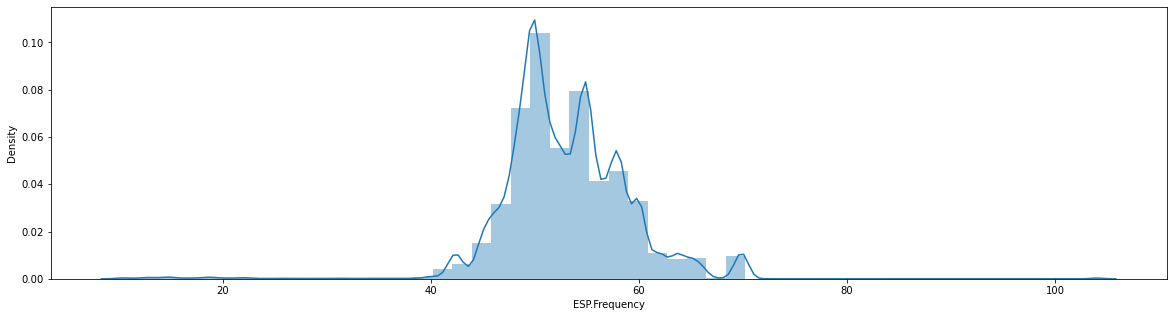

ESP.IntakePressure


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


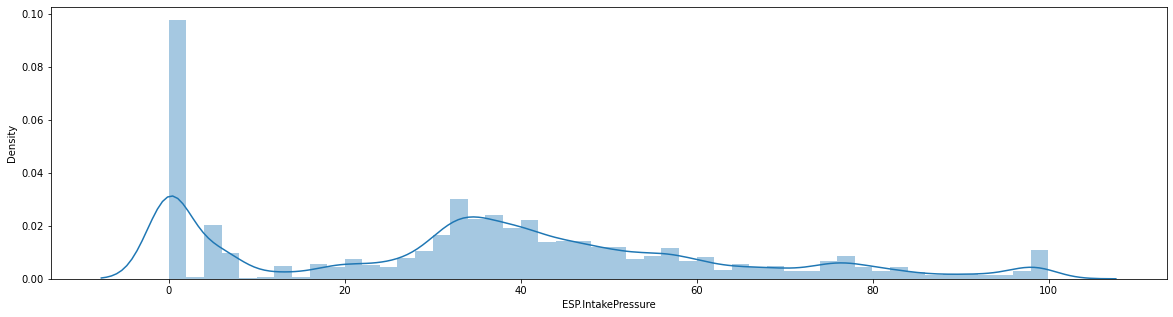

ESP.IntakeTemperature


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


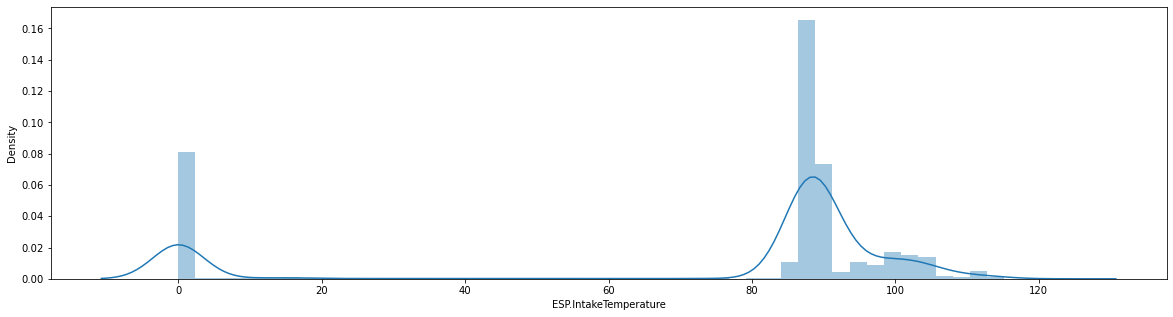

ESP.Motor.CurrentW


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


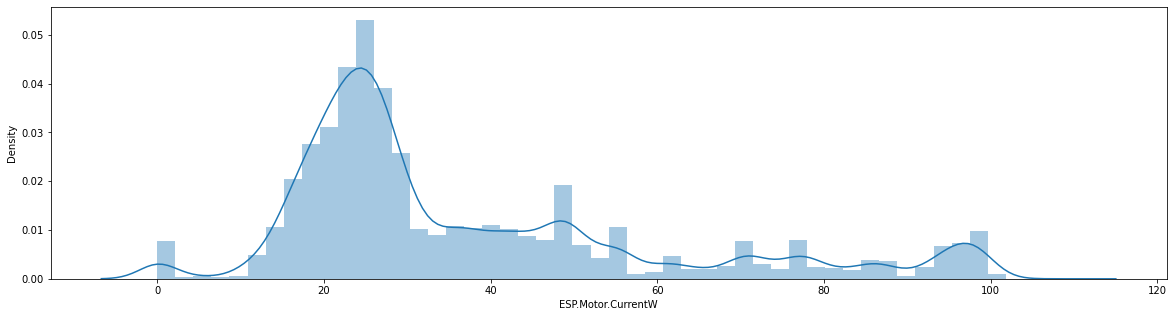

ESP.Motor.VoltageCA


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


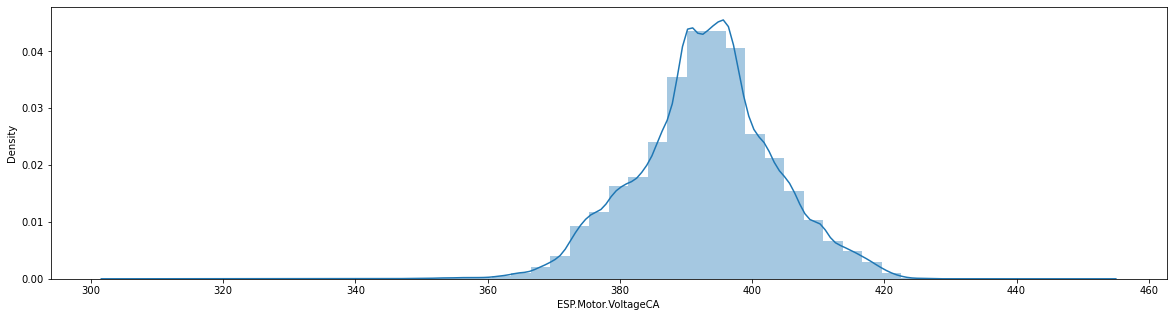

Sediments.Lab.Man


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


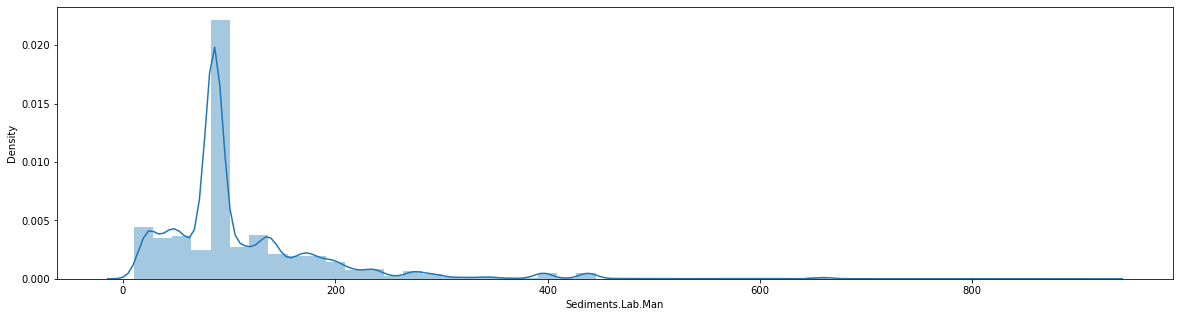

target


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


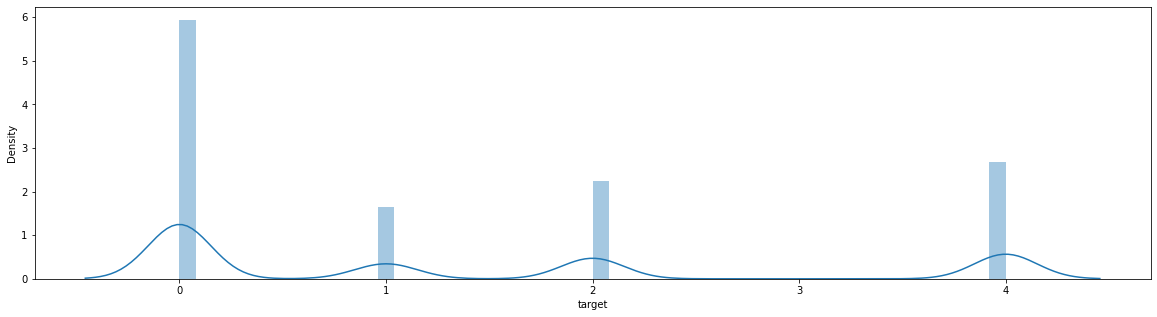

diff_FlowLinePressure


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


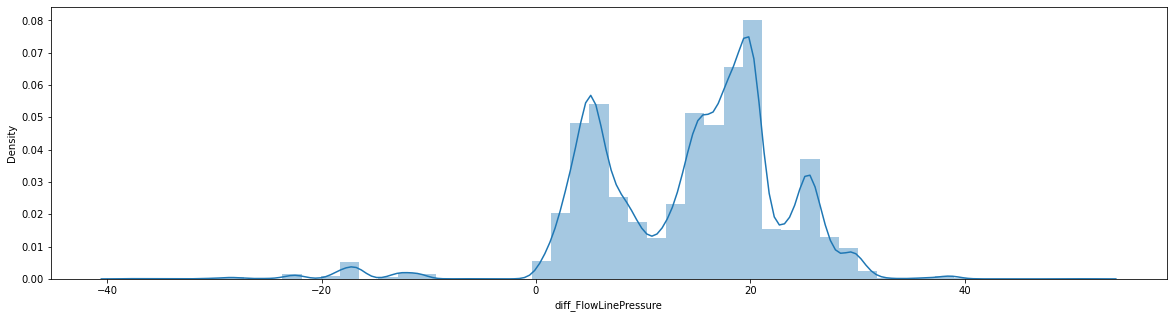

diff_ESP.Motor.Load


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


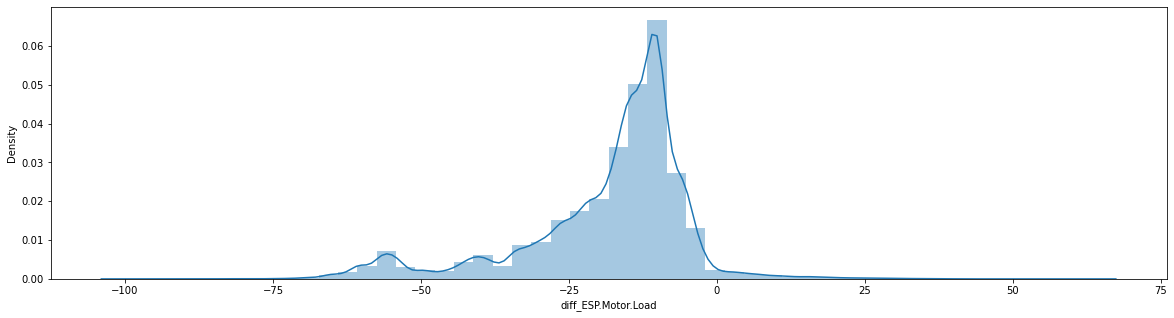

Power


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


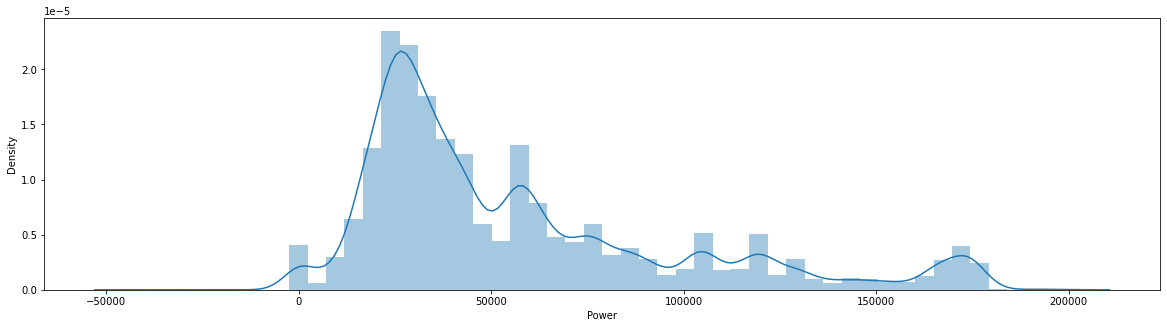

In [393]:
# создадим графики распределения 
for col in df.columns:
    print(col);
    plt.figure(figsize=(20,5));
    sns.distplot(df[col]);
    plt.show();

ESP.IntakePressure


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


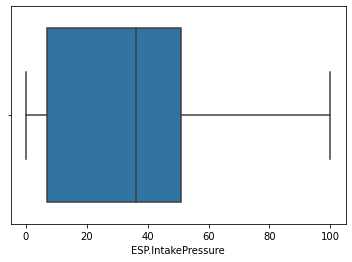

ESP.IntakeTemperature


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


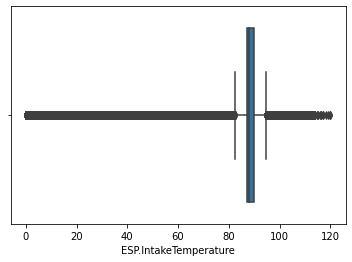

ESP.Motor.CurrentW


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


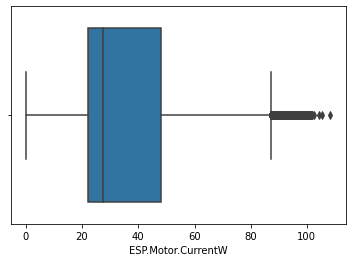

ESP.Motor.VoltageCA


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


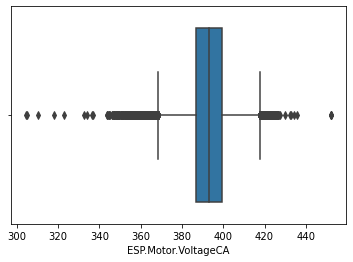

Sediments.Lab.Man


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


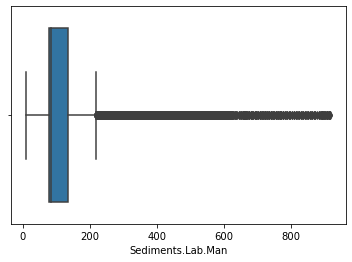

target


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


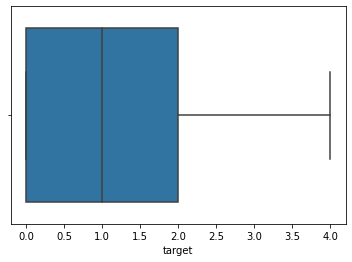

diff_FlowLinePressure


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


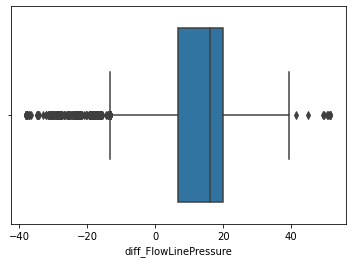

diff_ESP.Motor.Load


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


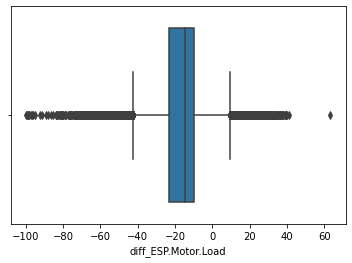

Power


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


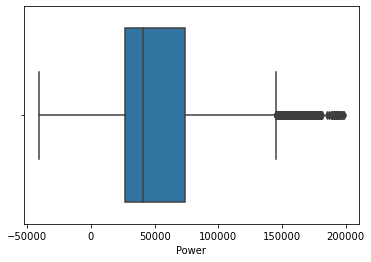

In [394]:
# создадим боксплоты
for col in df.columns[1:]:
    print(col);
    sns.boxplot(df[col]);
    plt.show();

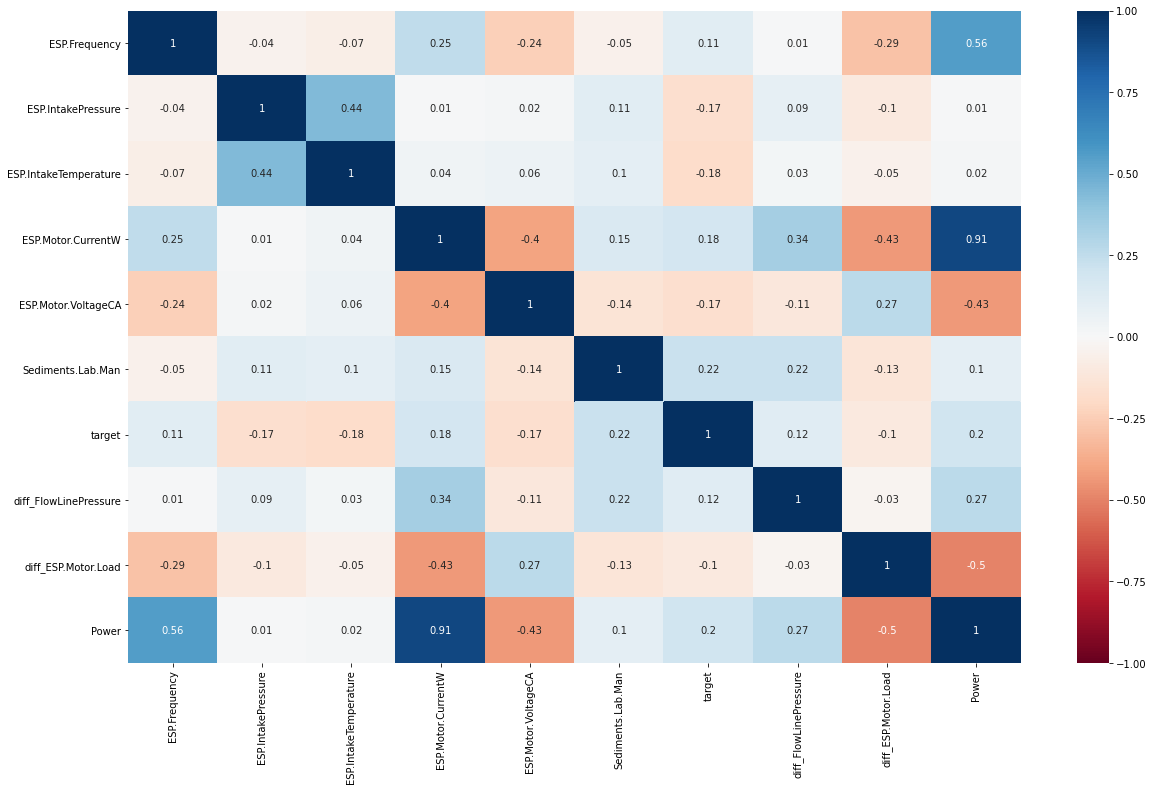

In [395]:
# Строим корреляционную матрицу
corr_matrix = df.corr().round(2)
figl, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap="RdBu", vmax=1, vmin=-1);

# Подготовка данных к обучению

In [396]:
# раскидаем данные на фичи и таргет
features = [
       'ESP.Frequency', 'ESP.IntakePressure',
       'ESP.IntakeTemperature', 'ESP.Motor.CurrentW', 'ESP.Motor.VoltageCA',
       'Sediments.Lab.Man', 'diff_FlowLinePressure',
       'diff_ESP.Motor.Load', 'Power'
]
target = ['target']

In [397]:
# конвертируем в numpy
x, y = df[features].to_numpy(), df[target].to_numpy()
x.shape, y.shape 

((117853, 9), (117853, 1))

In [398]:
# делаем нормализацию
scaler = StandardScaler()
x_norm = scaler.fit_transform(x)

In [399]:
# разбиваем на трейн/тест выборки
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.15, random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((100175, 9), (17678, 9), (100175, 1), (17678, 1))

# Создаем модель

In [402]:
# строим модель
rfc = RandomForestClassifier(max_depth=8)
rfc.fit(x_train, ravel(y_train))

RandomForestClassifier(max_depth=8)

In [403]:
# смотрим результат
print(metrics.classification_report(y_test, rfc.predict(x_test), digits=2))

              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90      8311
         1.0       0.98      0.92      0.95      2328
         2.0       0.96      0.76      0.85      3218
         4.0       0.95      0.85      0.90      3821

    accuracy                           0.90     17678
   macro avg       0.93      0.87      0.90     17678
weighted avg       0.91      0.90      0.90     17678



In [ ]:
'''Вместо вывода: модель показала неплохой результат, вероятнее всего из-за того, что в тестовой выборке данные
сильно похожи на данные из трейна, спасибо за внимание! :)'''

# Объеденим классы таргета в один и сделаем еще одну модель

In [408]:
# создадим копию дф
df2 = df.copy()

In [410]:
# объеденим все классы в один, а нуль оставим нулем
df2['target'] = [0 if row == 0 else 1 for row in df2['target']]

In [411]:
# посмотрим на результат объединения
df2['target'].value_counts()

1    61897
0    55956
Name: target, dtype: int64

In [412]:
# раскидаем данные на фичи и таргет
features2 = [
       'ESP.Frequency', 'ESP.IntakePressure',
       'ESP.IntakeTemperature', 'ESP.Motor.CurrentW', 'ESP.Motor.VoltageCA',
       'Sediments.Lab.Man', 'diff_FlowLinePressure',
       'diff_ESP.Motor.Load', 'Power'
]
target2 = ['target']

In [413]:
# конвертируем в numpy
x2, y2 = df2[features2].to_numpy(), df2[target2].to_numpy()
x2.shape, y2.shape 

((117853, 9), (117853, 1))

In [414]:
# делаем нормализацию
scaler = StandardScaler()
x_norm2 = scaler.fit_transform(x2)

In [415]:
# разбиваем на трейн/тест выборки
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_norm2, y2, test_size=0.15, random_state=1)
x_train2.shape, x_test2.shape, y_train2.shape, y_test2.shape

((100175, 9), (17678, 9), (100175, 1), (17678, 1))

In [416]:
# строим модель
rfc2 = RandomForestClassifier(max_depth=8)
rfc2.fit(x_train2, ravel(y_train2))

RandomForestClassifier(max_depth=8)

In [417]:
# смотрим результат
print(metrics.classification_report(y_test2, rfc2.predict(x_test2), digits=2))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      8311
           1       0.96      0.92      0.94      9367

    accuracy                           0.94     17678
   macro avg       0.94      0.94      0.94     17678
weighted avg       0.94      0.94      0.94     17678



In [419]:
# смотрим результат
print(f'Roc_auc score is {roc_auc_score(y_test2, rfc2.predict(x_test2))}')

Roc_auc score is 0.9383567733062989
